In [4]:
import math

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
#get data
ticker= 'SPY'
spy = yf.download(ticker, start='2000-01-01', end='2024-06-4')

[*********************100%%**********************]  1 of 1 completed


In [6]:
#get data
ticker = 'QQQ'
qqq = yf.download(ticker, start='2000-01-01', end='2024-05-13')

[*********************100%%**********************]  1 of 1 completed


In [7]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6143 entries, 2000-01-03 to 2024-06-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6143 non-null   float64
 1   High       6143 non-null   float64
 2   Low        6143 non-null   float64
 3   Close      6143 non-null   float64
 4   Adj Close  6143 non-null   float64
 5   Volume     6143 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 335.9 KB


In [8]:
qqq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6128 entries, 2000-01-03 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6128 non-null   float64
 1   High       6128 non-null   float64
 2   Low        6128 non-null   float64
 3   Close      6128 non-null   float64
 4   Adj Close  6128 non-null   float64
 5   Volume     6128 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 335.1 KB


<AxesSubplot: xlabel='Date'>

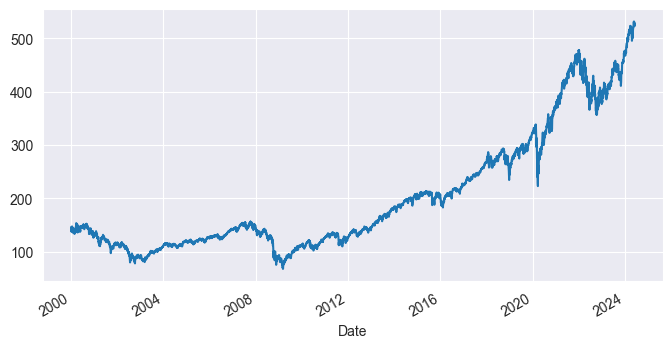

In [9]:
spy['Close'].plot(figsize=(8,4))

<AxesSubplot: xlabel='Date'>

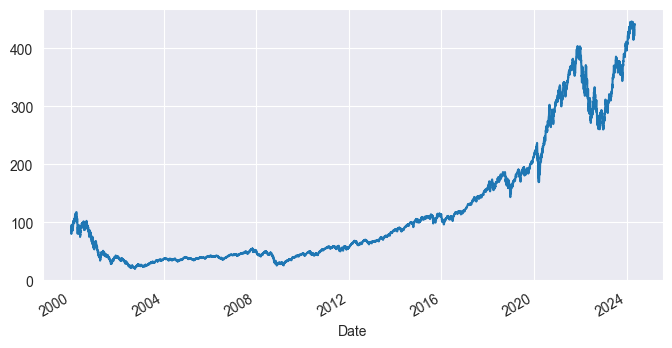

In [10]:
qqq['Close'].plot(figsize=(8,4))

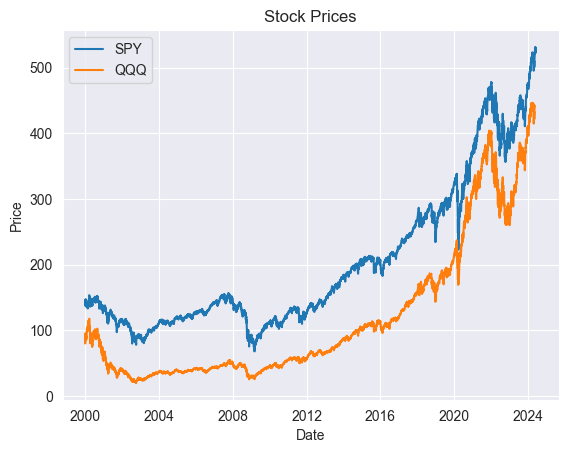

In [11]:
plt.plot(spy['Close'], label='SPY')
plt.plot(qqq['Close'], label='QQQ')
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
#custom statistics -- using the aggregate() method also allows one to pass custom functions
spy['Adj Close'].aggregate([min, np.mean, np.std, np.median, max]).round(2)

min        51.02
mean      174.53
std       120.43
median    110.04
max       531.36
Name: Adj Close, dtype: float64

In [13]:
qqq['Adj Close'].aggregate([min, np.mean, np.std, np.median, max]).round(2)

min        17.11
mean      113.29
std       108.32
median     61.51
max       446.38
Name: Adj Close, dtype: float64

In [14]:
spy.pct_change().round(3).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-28,0.005,0.000,0.000,0.001,0.001,-0.121
2024-05-29,-0.009,-0.006,-0.003,-0.007,-0.007,0.246
2024-05-30,-0.002,-0.004,-0.008,-0.007,-0.007,0.028
2024-05-31,-0.002,0.004,-0.006,0.009,0.009,0.943
2024-06-03,0.010,0.003,0.008,-0.005,-0.005,-0.696


In [15]:
qqq.pct_change().round(3).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-06,0.007,0.009,0.009,0.011,0.011,-0.377
2024-05-07,0.008,0.004,0.007,0.000,0.000,0.025
2024-05-08,-0.007,-0.001,-0.005,-0.001,-0.001,-0.197
2024-05-09,0.006,0.000,0.002,0.002,0.002,-0.013
2024-05-10,0.005,0.006,0.005,0.002,0.002,0.103


<AxesSubplot: >

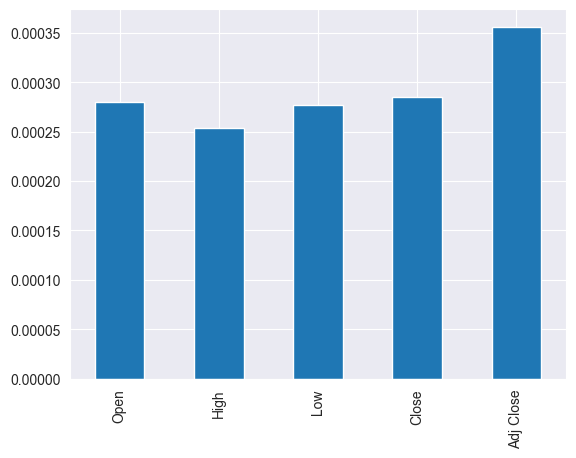

In [16]:
#drop volume column
spy.drop(columns='Volume', inplace=True)
spy.pct_change().mean().plot(kind='bar')

<AxesSubplot: >

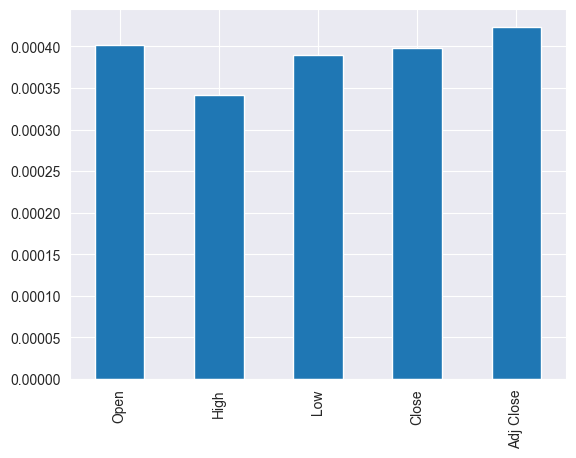

In [17]:
qqq.drop(columns='Volume', inplace=True)
qqq.pct_change().mean().plot(kind='bar')

In [18]:
#alternative to percentage returns 
spy_rets = np.log(spy / spy.shift(1)) 
spy_rets.tail().round(3)

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-05-28,0.005,0.000,0.000,0.001,0.001
2024-05-29,-0.009,-0.006,-0.003,-0.007,-0.007
2024-05-30,-0.002,-0.004,-0.008,-0.007,-0.007
2024-05-31,-0.002,0.004,-0.006,0.009,0.009
2024-06-03,0.010,0.003,0.008,-0.005,-0.005


In [19]:
qqq_rets = np.log(qqq / qqq.shift(1))
qqq_rets.tail().round(3)

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-05-06,0.007,0.009,0.009,0.011,0.011
2024-05-07,0.008,0.004,0.007,0.000,0.000
2024-05-08,-0.007,-0.001,-0.005,-0.001,-0.001
2024-05-09,0.006,0.000,0.002,0.002,0.002
2024-05-10,0.005,0.006,0.005,0.002,0.002


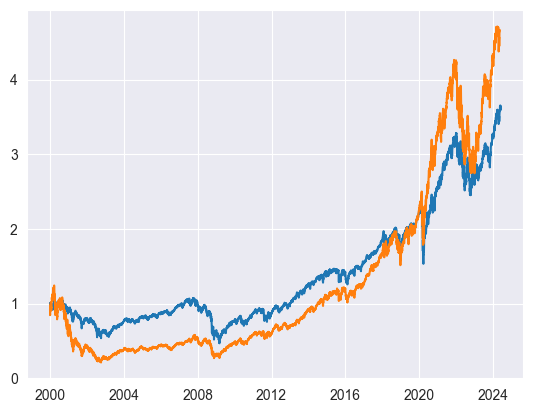

In [20]:
#plot log cumulative returns 
plt.plot(spy_rets['Close'].cumsum().apply(np.exp))
plt.plot(qqq_rets['Close'].cumsum().apply(np.exp))

In [21]:
#data resample 1 week 
spy.resample('1w', label='right').last().tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-05-12,521.809998,522.640015,519.590027,520.840027,520.840027
2024-05-19,528.809998,529.520020,527.320007,529.450012,529.450012
2024-05-26,527.849976,530.270020,526.880005,529.440002,529.440002
2024-06-02,523.590027,527.500000,518.359985,527.369995,527.369995
2024-06-09,529.020020,529.159973,522.609985,524.489990,524.489990


In [22]:
spy.resample('1m', label='right').last().tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-02-29,508.070007,509.739990,505.350006,508.079987,506.506256
2024-03-31,523.210022,524.609985,522.780029,523.070007,523.070007
2024-04-30,508.559998,509.559998,501.980011,501.980011,501.980011
2024-05-31,523.590027,527.500000,518.359985,527.369995,527.369995
2024-06-30,529.020020,529.159973,522.609985,524.489990,524.489990


In [23]:
qqq.resample('1w', label='right').last().tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-04-14,441.100006,442.239990,436.880005,438.269989,438.269989
2024-04-21,422.220001,422.750000,413.070007,414.649994,414.649994
2024-04-28,427.619995,432.549988,426.920013,431.000000,431.000000
2024-05-05,434.440002,436.480011,432.619995,435.480011,435.480011
2024-05-12,442.540009,444.309998,440.500000,442.059998,442.059998


In [24]:
qqq.resample('1m', label='right').last().tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-01-31,420.850006,422.869995,416.790009,416.970001,416.419373
2024-02-29,438.230011,440.089996,435.019989,439.000000,438.420288
2024-03-31,444.779999,445.640015,443.649994,444.010010,444.010010
2024-04-30,431.149994,432.559998,424.510010,424.589996,424.589996
2024-05-31,442.540009,444.309998,440.500000,442.059998,442.059998


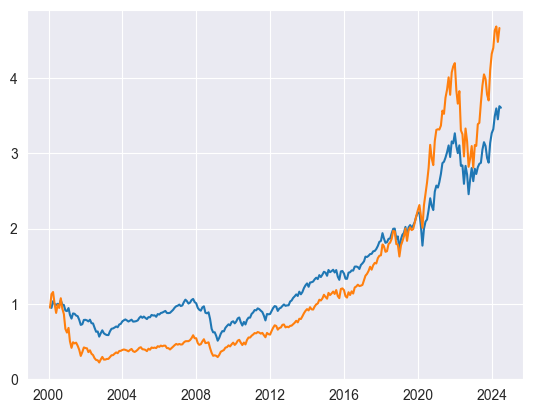

In [25]:
#plot cumulative log returns over time
plt.plot(spy_rets['Close'].cumsum().apply(np.exp).resample('1m', label='right').last())
plt.plot(qqq_rets['Close'].cumsum().apply(np.exp).resample('1m', label='right').last())

In [26]:
spy

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,93.591141
2000-01-04,143.531250,144.062500,139.640625,139.750000,89.931145
2000-01-05,139.937500,141.531250,137.250000,140.000000,90.092010
2000-01-06,139.625000,141.500000,137.750000,137.750000,88.644127
2000-01-07,140.312500,145.750000,140.062500,145.750000,93.792244
...,...,...,...,...,...
2024-05-28,530.270020,530.510010,527.109985,529.809998,529.809998
2024-05-29,525.679993,527.309998,525.369995,526.099976,526.099976
2024-05-30,524.520020,525.200012,521.330017,522.609985,522.609985


Rolling Statistics

In [27]:
sym = spy['Close']
data = pd.DataFrame(sym).dropna()
window = 20

In [28]:
data['min'] = sym.rolling(window=window).min()

In [29]:
data['mean'] = sym.rolling(window=window).mean()

In [30]:
data['std'] = sym.rolling(window=window).std()

In [31]:
data['median'] = sym.rolling(window=window).median()

In [32]:
data['max'] = sym.rolling(window=window).max()

In [33]:
data['ewma'] = sym.ewm(halflife=0.5, min_periods=window).mean()

In [34]:
data.dropna().tail()

,Close,min,mean,std,median,max,ewma
Date,,,,,,,
2024-05-28,529.809998,500.350006,520.957504,9.843473,522.104980,531.359985,529.564970
2024-05-29,526.099976,500.350006,522.163503,8.820420,524.630005,531.359985,526.966224
2024-05-30,522.609985,505.029999,523.276501,7.173753,524.630005,531.359985,523.699045
2024-05-31,527.369995,511.290009,524.393501,5.788645,526.029999,531.359985,526.452258
2024-06-03,524.489990,516.570007,525.053500,4.900353,526.029999,531.359985,524.980557


<AxesSubplot: xlabel='Date'>

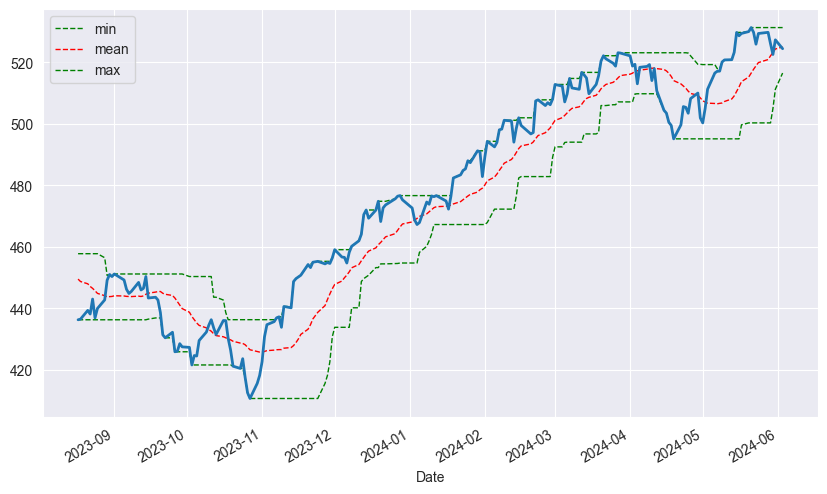

In [35]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10,6), style=['g--', 'r--', 'g--'], lw=1.0)
data['Close'].iloc[-200:].plot(ax=ax, lw=2.0)

In [36]:
data['SMA1'] = data['Close'].rolling(window=42).mean()

In [37]:
data['SMA2'] = data['Close'].rolling(window=252).mean()

In [38]:
data[['Close', 'SMA1', 'SMA2']].tail()

,Close,SMA1,SMA2
Date,,,
2024-05-28,529.809998,515.498572,468.044247
2024-05-29,526.099976,515.570714,468.465199
2024-05-30,522.609985,515.581429,468.871667
2024-05-31,527.369995,515.784523,469.306271
2024-06-03,524.489990,515.905476,469.713691


<AxesSubplot: xlabel='Date'>

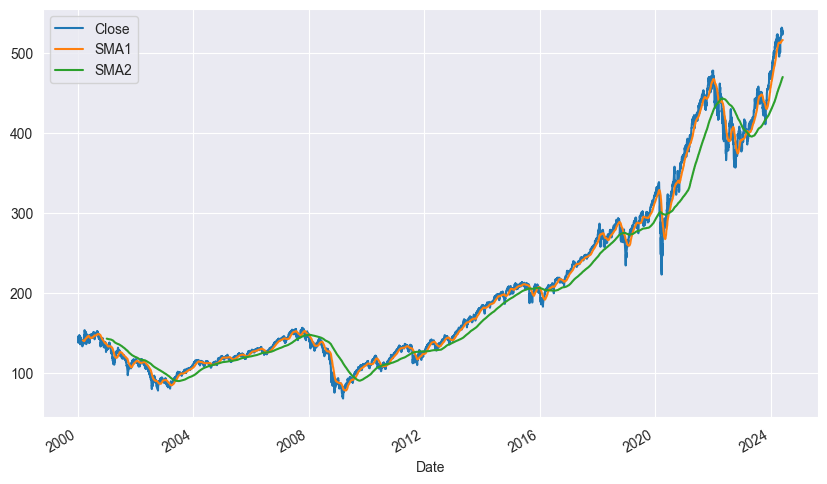

In [39]:
data[['Close', 'SMA1', 'SMA2']].plot(figsize=(10,6))

In [40]:
data.dropna(inplace=True)

In [41]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

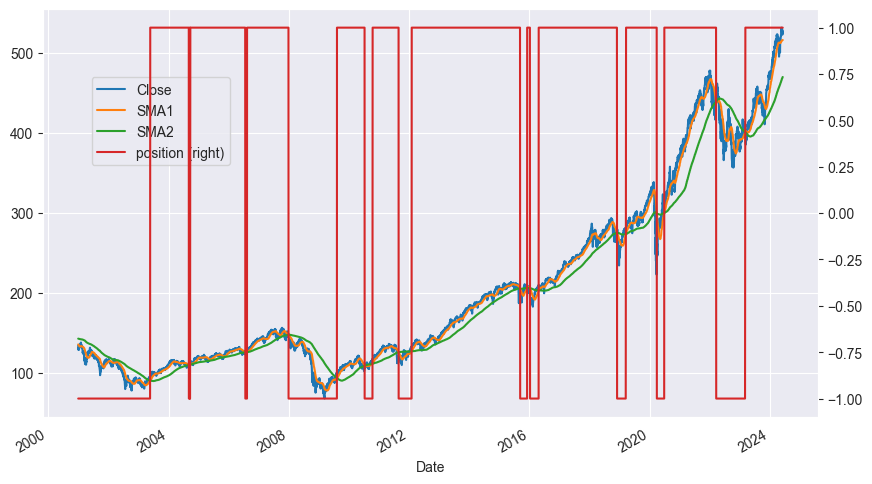

In [42]:
ax = data[['Close', 'SMA1', 'SMA2', 'position']].plot(figsize=(10,6), secondary_y = 'position')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

Regression Analysis -

In [43]:
ticker= '^VIX'
vix = yf.download(ticker, start='2000-01-01', end='2024-05-14')

[*********************100%%**********************]  1 of 1 completed


In [44]:
data = pd.concat([spy['Close'], vix['Close']], axis=1)
data.columns = ['SPY', 'VIX']
data.tail()

,SPY,VIX
Date,,
2024-05-28,529.809998,NaN
2024-05-29,526.099976,NaN
2024-05-30,522.609985,NaN
2024-05-31,527.369995,NaN
2024-06-03,524.489990,NaN


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

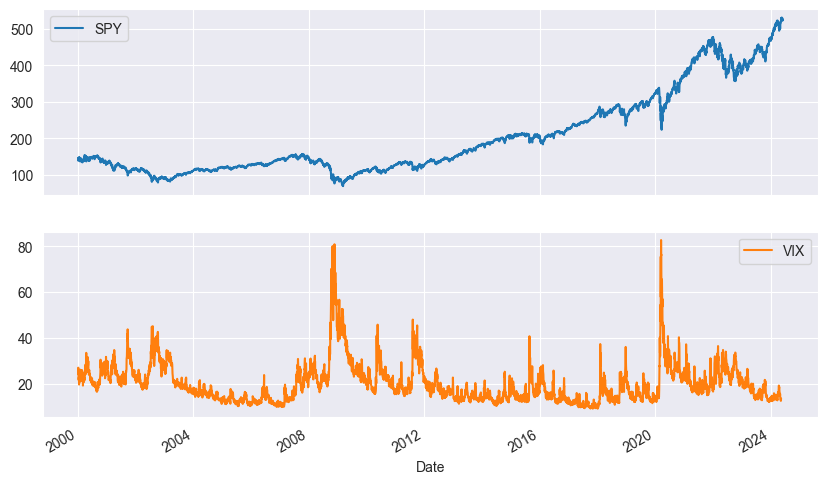

In [45]:
data.plot(subplots=True, figsize=(10,6))

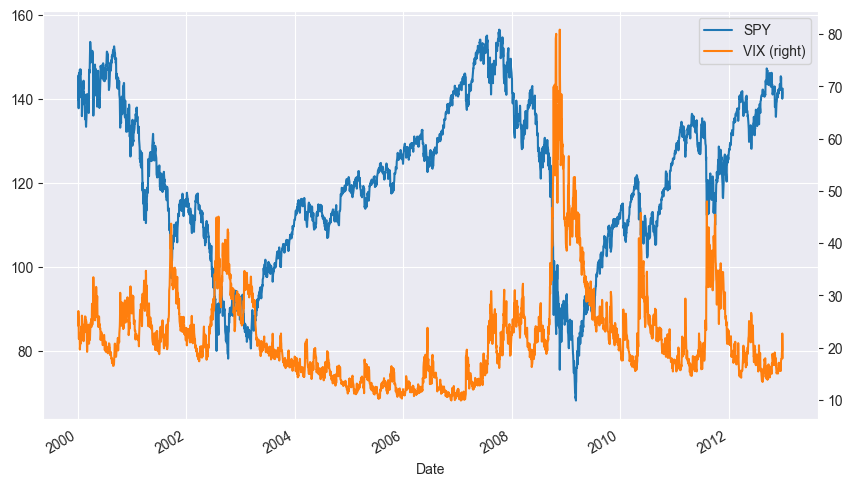

In [46]:
data.loc[:'2012-12-31'].plot(secondary_y= 'VIX', figsize=(10,6));

Log Returns

In [47]:
rets = np.log(data / data.shift(1)) #This calculates the log returns

In [48]:
rets.tail()

,SPY,VIX
Date,,
2024-05-28,0.000699,NaN
2024-05-29,-0.007027,NaN
2024-05-30,-0.006656,NaN
2024-05-31,0.009067,NaN
2024-06-03,-0.005476,NaN


In [49]:
rets.dropna(inplace=True)

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

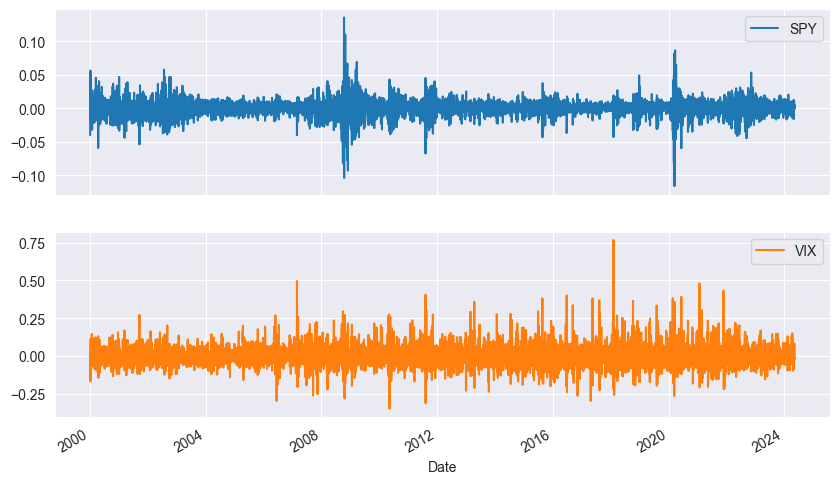

In [50]:
rets.plot(subplots=True, figsize=(10,6))

array([[<AxesSubplot: xlabel='SPY', ylabel='SPY'>,
        <AxesSubplot: xlabel='VIX', ylabel='SPY'>],
       [<AxesSubplot: xlabel='SPY', ylabel='VIX'>,
        <AxesSubplot: xlabel='VIX', ylabel='VIX'>]], dtype=object)

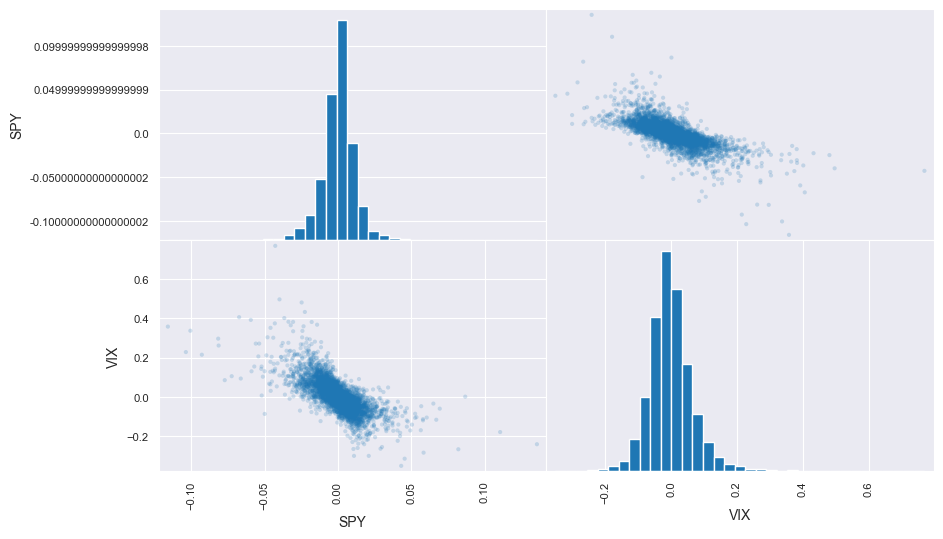

In [51]:
pd.plotting.scatter_matrix(rets, alpha = 0.2, diagonal='hist', hist_kwds={'bins':35}, figsize=(10,6))                      
                           

In [52]:
#Ols Regression
reg = np.polyfit(rets['SPY'], rets['VIX'], deg=1) #This implements a linear OSL Regression

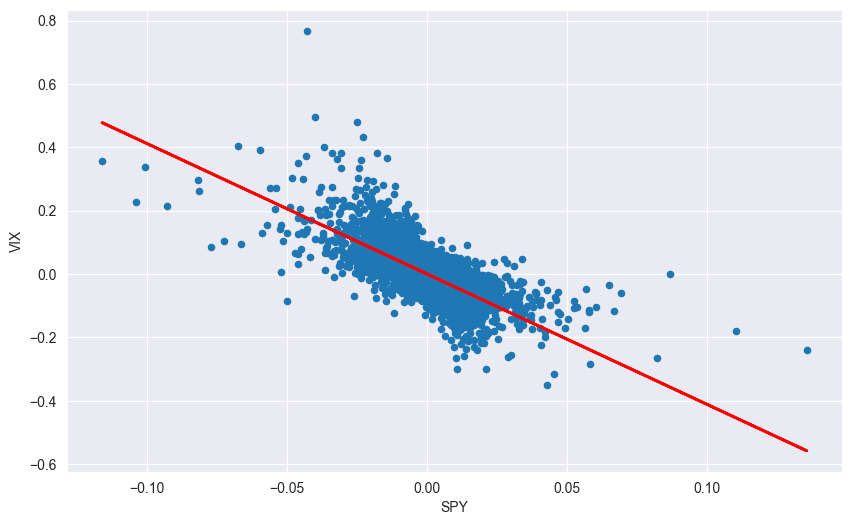

In [53]:
ax = rets.plot(kind='scatter', x='SPY', y='VIX', figsize=(10,6)) #This Plots the log returns as a scatter plot
ax.plot(rets['SPY'], np.polyval(reg, rets['SPY']), 'r', lw=2)

In [54]:
#Correlation
rets.corr()

,SPY,VIX
SPY,1.000000,-0.724928
VIX,-0.724928,1.000000


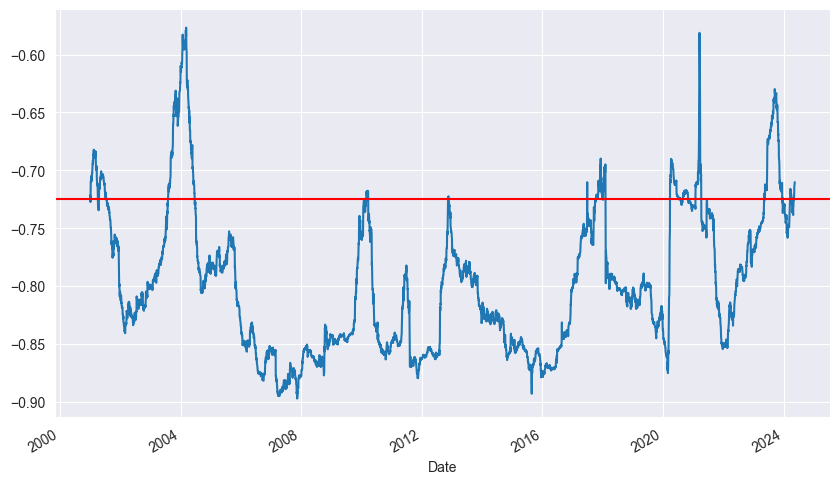

In [55]:
ax = rets['SPY'].rolling(window=252).corr(rets['VIX']).plot(figsize=(10,6))
ax.axhline(rets.corr().iloc[0,1], c='r')

## Mathematical Tools for Finance

In [56]:
#Polynomial Approximation 
x = np.arange(len(data.index))
y = data['SPY'].values

In [57]:
p = np.poly1d(np.polyfit(x, y, 3))

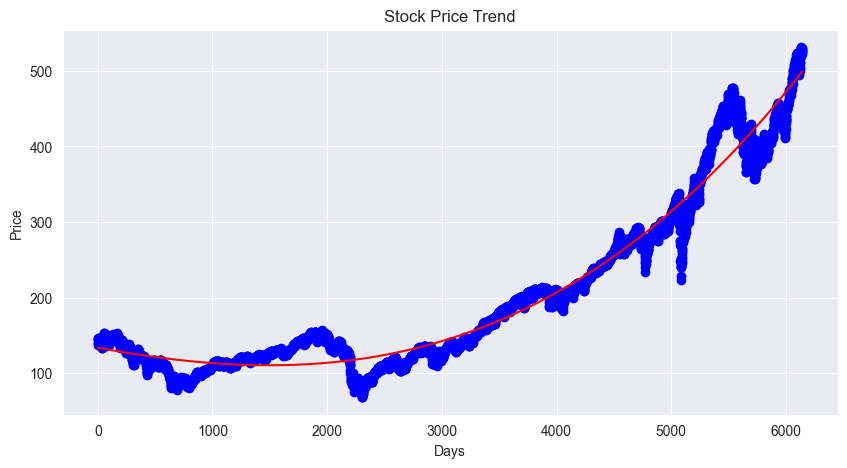

In [58]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue')  # Original data
plt.plot(x, p(x), color='red')   # Polynomial line
plt.title('Stock Price Trend')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

## Covariance Matrix of the Stocks

In [59]:
import scipy.stats as scs
from scipy.stats import skew, kurtosis, skewtest
import statsmodels.api as sm 
from pylab import mpl, plt
import math

In [60]:
tickers = ['CCJ', 'QQQ', 'SOFI', 'AMD', 'AMZN' , 'RTX', 'SPY']
stock_data = yf.download(tickers, start='2021-01-01', end='2024-05-20')['Adj Close']

[*********************100%%**********************]  7 of 7 completed


In [61]:
stock_data

Ticker,AMD,AMZN,CCJ,QQQ,RTX,SOFI,SPY
Date,,,,,,,
2021-01-04,92.300003,159.331497,13.277563,303.077484,62.816200,12.200000,351.674500
2021-01-05,92.769997,160.925507,14.447654,305.576080,63.724983,12.150000,354.096558
2021-01-06,90.330002,156.919006,14.298914,301.343140,64.514442,12.120000,356.213562
2021-01-07,95.160004,158.108002,14.556731,308.633270,64.055443,19.139999,361.506012
2021-01-08,94.580002,159.134995,14.189838,312.601593,64.128891,18.740000,363.565735
...,...,...,...,...,...,...,...
2024-05-13,150.559998,186.570007,48.980000,443.079987,105.167313,7.110000,520.909973
2024-05-14,153.160004,187.070007,49.980000,445.929993,105.067902,7.470000,523.299988
2024-05-15,159.669998,185.990005,49.970001,452.899994,104.720001,7.270000,529.780029


<AxesSubplot: xlabel='Date'>

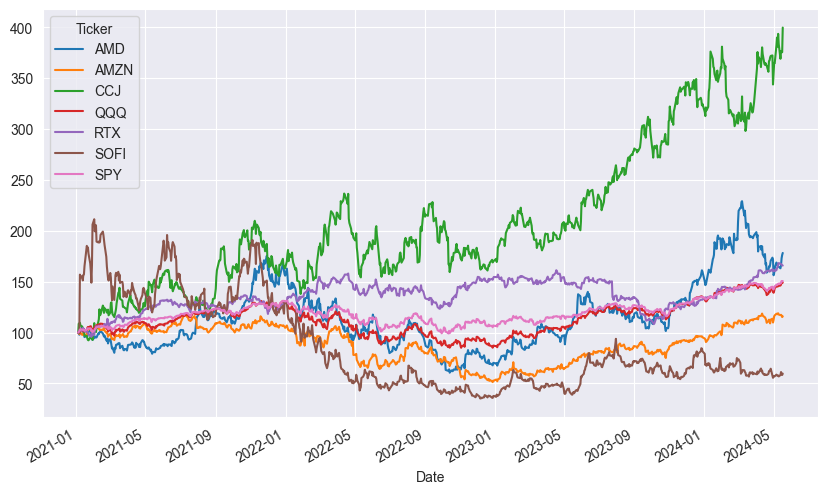

In [62]:
#Normalized Prices of financial instruments over time 
(stock_data / stock_data.iloc[0]*100).plot(figsize=(10,6)) # compare how stocks have performed relative to the start date (2021-01-01')

In [63]:
log_returns = np.log(stock_data / stock_data.shift(1)) #comupte returns, capturing percentage changes 

In [64]:
log_returns.head()

Ticker,AMD,AMZN,CCJ,QQQ,RTX,SOFI,SPY
Date,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.005079,0.009955,0.084456,0.008210,0.014364,-0.004107,0.006864
2021-01-06,-0.026654,-0.025212,-0.010348,-0.013949,0.012312,-0.002472,0.005961
2021-01-07,0.052090,0.007549,0.017870,0.023904,-0.007140,0.456923,0.014748
2021-01-08,-0.006114,0.006475,-0.025527,0.012776,0.001146,-0.021120,0.005681


array([[<AxesSubplot: title={'center': 'AMD'}>,
        <AxesSubplot: title={'center': 'AMZN'}>,
        <AxesSubplot: title={'center': 'CCJ'}>],
       [<AxesSubplot: title={'center': 'QQQ'}>,
        <AxesSubplot: title={'center': 'RTX'}>,
        <AxesSubplot: title={'center': 'SOFI'}>],
       [<AxesSubplot: title={'center': 'SPY'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

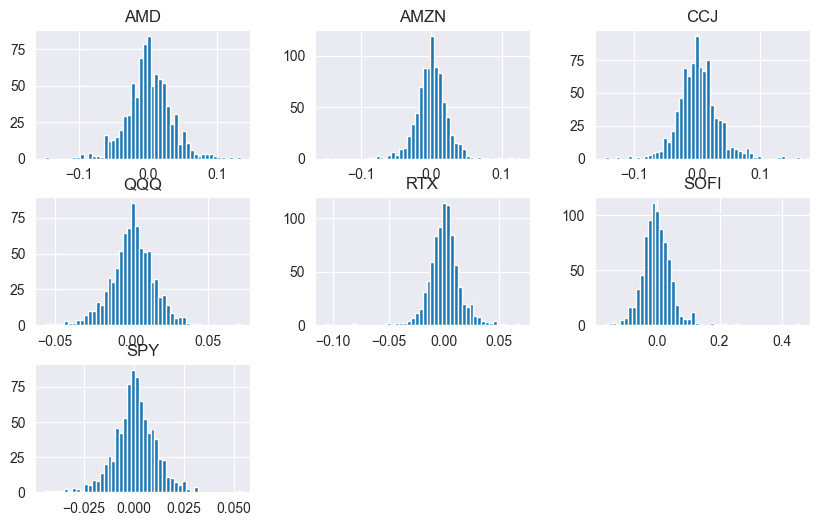

In [65]:
log_returns.hist(bins=50, figsize=(10,6)) #Histogram of log returns

In [66]:
def print_statistics(array):
    print('Size: ', array.size)
    print('Min: ', np.min(array))
    print('Max: ', np.max(array))
    print("Mean: ", np.mean(array))
    print("Standard Deviation: ", np.std(array))
    print('Skewness: ', skew(array))
    print("Kurtosis: ", kurtosis(array)) #

In [67]:
for s in tickers: 
    print('\nResults for ticker {}'.format(s))
    print(30 * '-')
    log_data = np.array(log_returns[s].dropna())
    print_statistics(log_data)


Results for ticker CCJ
------------------------------
Size:  848
Min:  -0.14656268342912745
Max:  0.16376606490200937
Mean:  0.0016334424827172845
Standard Deviation:  0.03152812706677434
Skewness:  0.31388318574656
Kurtosis:  2.7884858295390647

Results for ticker QQQ
------------------------------
Size:  848
Min:  -0.05639768722539053
Max:  0.07119306728864165
Mean:  0.00047071060254658516
Standard Deviation:  0.014506081171471698
Skewness:  -0.17696897231060296
Kurtosis:  1.3414497721813028

Results for ticker SOFI
------------------------------
Size:  848
Min:  -0.16567761568596287
Max:  0.45692338293716295
Mean:  -0.0006088502890056381
Standard Deviation:  0.04824485240920775
Skewness:  1.4188705978155967
Kurtosis:  10.994291479558365

Results for ticker AMD
------------------------------
Size:  848
Min:  -0.14929880040853744
Max:  0.13338540231062204
Mean:  0.0006812311504751747
Standard Deviation:  0.032066241464641404
Skewness:  0.005155990593804164
Kurtosis:  1.45951573958739

Text(0, 0.5, 'Sample quantiles')

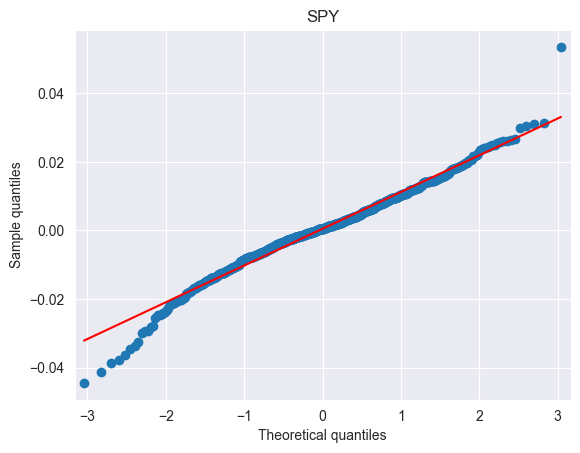

In [68]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')

In [69]:
def normality_test(array):
    print('Skew of data set, ', scs.skew(array))
    print('Skew test p-value ',  scs.skewtest(array)[1])
    print('Kurt of data set ', scs.kurtosis(array))
    print('Kurt test p-value ', scs.kurtosistest(array)[1])
    print('Norm test p-value ', scs.normaltest(array)[1])

In [70]:
for s in tickers:
    print('\nResults for ticker {}'.format(s))
    print(30 * '-')
    log_data = np.array(log_returns[s].dropna())
    normality_test(log_data)


Results for ticker CCJ
------------------------------
Skew of data set,  0.31388318574656
Skew test p-value  0.0002341747741756727
Kurt of data set  2.7884858295390647
Kurt test p-value  7.51437903036787e-15
Norm test p-value  8.56122341951399e-17

Results for ticker QQQ
------------------------------
Skew of data set,  -0.17696897231060296
Skew test p-value  0.035183767635624065
Kurt of data set  1.3414497721813028
Kurt test p-value  2.509764484188118e-07
Norm test p-value  1.8272327858326624e-07

Results for ticker SOFI
------------------------------
Skew of data set,  1.4188705978155967
Skew test p-value  1.5844061158418134e-38
Kurt of data set  10.994291479558365
Kurt test p-value  1.5380455361129395e-38
Norm test p-value  6.526424323755037e-74

Results for ticker AMD
------------------------------
Skew of data set,  0.005155990593804164
Skew test p-value  0.9507006993988597
Kurt of data set  1.459515739587392
Kurt test p-value  5.4807392672982336e-08
Norm test p-value  3.84496956

Portfolio Optimization

In [71]:
log_returns.mean() * 252

Ticker
AMD     0.171670
AMZN    0.043906
CCJ     0.411628
QQQ     0.118619
RTX     0.150340
SOFI   -0.153430
SPY     0.121582
dtype: float64

In [72]:
log_returns.cov() * 252 #cvariance matrix

Ticker,AMD,AMZN,CCJ,QQQ,RTX,SOFI,SPY
Ticker,,,,,,,
AMD,0.259423,0.102618,0.078594,0.088918,0.023451,0.148660,0.058132
AMZN,0.102618,0.131600,0.052756,0.065681,0.018302,0.102889,0.044144
CCJ,0.078594,0.052756,0.250789,0.044295,0.036792,0.103622,0.036193
QQQ,0.088918,0.065681,0.044295,0.053090,0.018318,0.084386,0.036874
RTX,0.023451,0.018302,0.036792,0.018318,0.054371,0.023819,0.019438
SOFI,0.148660,0.102889,0.103622,0.084386,0.023819,0.587239,0.057571
SPY,0.058132,0.044144,0.036193,0.036874,0.019438,0.057571,0.028981


The basic Theory equal weights

In [92]:
noa = len(tickers) #number of assets

In [74]:
weights = np.random.random(noa) #random weights

In [75]:
weights/= np.sum(weights) #normalize weights

In [76]:
weights

array([0.14388223, 0.12079612, 0.02366312, 0.17536617, 0.22071034,
       0.16742351, 0.1481585 ])

In [77]:
weights.sum().round()

1.0

In [78]:
np.sum(log_returns.mean() * weights) * 252 # Annualized portfolio return given the portfolio weights

0.08605331712270468

In [79]:
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)) #Annualized Portfolio variance given the portfolio weights

0.07433476680891929

In [80]:
math.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights ))) #Annualized Portfolio volatility given the weights

0.2726440294760171

In [81]:
def port_ret(weights): 
    return np.sum(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

In [82]:
def port_vol(weights): 
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights )))

In [83]:
prets = []
pvols = []

for i in range(2500): #2500 random portfolios, each with 7 stocks, each with random weights
    weights = np.random.random(noa) #random weights
    weights /=np.sum(weights) #normalize weights
    prets.append(port_ret(weights)) #append the portfolio returns
    pvols.append(port_vol(weights)) #append the portfolio volatilities
    
prets = np.array(prets) #convert to numpy array
pvols = np.array(pvols) #convert to numpy array

33

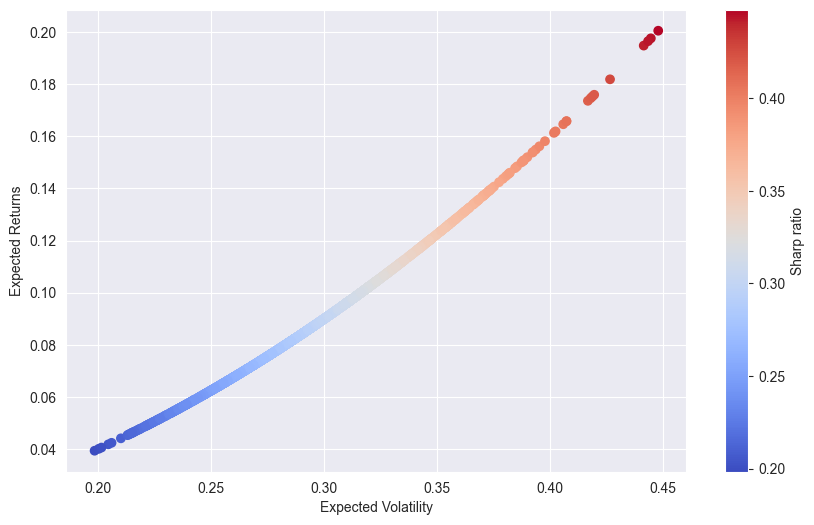

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharp ratio')
33

In [85]:
daily_returns = stock_data.pct_change()

In [86]:
cov_matrix = daily_returns.cov()

In [87]:
print(cov_matrix)

Ticker       AMD      AMZN       CCJ       QQQ       RTX      SOFI       SPY
Ticker                                                                      
AMD     0.001034  0.000407  0.000311  0.000353  0.000092  0.000597  0.000230
AMZN    0.000407  0.000522  0.000208  0.000260  0.000072  0.000408  0.000174
CCJ     0.000311  0.000208  0.001011  0.000176  0.000146  0.000414  0.000143
QQQ     0.000353  0.000260  0.000176  0.000210  0.000073  0.000338  0.000146
RTX     0.000092  0.000072  0.000146  0.000073  0.000215  0.000092  0.000077
SOFI    0.000597  0.000408  0.000414  0.000338  0.000092  0.002537  0.000230
SPY     0.000230  0.000174  0.000143  0.000146  0.000077  0.000230  0.000115


In [88]:
sample_size = stock_data['CCJ']

In [89]:
np.average(sample_size)

27.76892757078784

In [90]:
np.mean(sample_size)

27.76892757078784

In [91]:
np.std(sample_size)

9.525290540291579